# Notebook: Analyse data from experiment 2 (Deelvraag 4)

## 1. Data preperation
Before we start lets get some important imports out of the way.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import List
import seaborn as sns


Next lets create a utility function to get the dataframes from the run relating to a specific experiment

In [41]:
def get_experiment_dataframes(run: int = 0, range: List[int] = [0, 1, 2], csv_file: str = "opnames") -> List[pd.DataFrame]:
    result: List[pd.DataFrame] = []
    for frame_index in range:
        run_location = f"../runs/run{run}/params{frame_index}/{csv_file}.csv"
        df = pd.read_csv(run_location, delimiter=";")
        result.append(df)
    return result


## 2. Data Analysis


### Experiment 1

First we will start by checking the ratios across the different scenarios regarding the amount of refused patients. A simple bar plot will give us a clear view over the ratios of refused patient against accepted patients.

|   **Scenario** |1|
|---|---|
| **Planning method**  |  24 hours later |
| **Specialised** |  No |
| **Efficiency** |  0% |

|   **Scenario** |2|
|---|---|
| **Planning method**  |  random day within the coming week |
| **Specialised** |  No |
| **Efficiency** |  0% |


|   **Scenario** |3|
|---|---|
| **Planning method**  |  least busy day in the coming 2 weeks |
| **Specialised** |  No |
| **Efficiency** |  0% |

In [42]:
opnames_scenario_1, opnames_scenario_2, opnames_scenario_3 = get_experiment_dataframes(2, [0, 1, 2], "opnames")
geweigerd_scenario_1, geweigerd_scenario_2, geweigerd_scenario_3 = get_experiment_dataframes(2, [0, 1, 2], "geweigerd")
replanning_scenario_1, replanning_scenario_2, replanning_scenario_3 = get_experiment_dataframes(2, [0, 1, 2], "replanning")

opnames_original, = get_experiment_dataframes(2, [0], "opnames")
geweigerd_original, = get_experiment_dataframes(2, [0], "geweigerd")

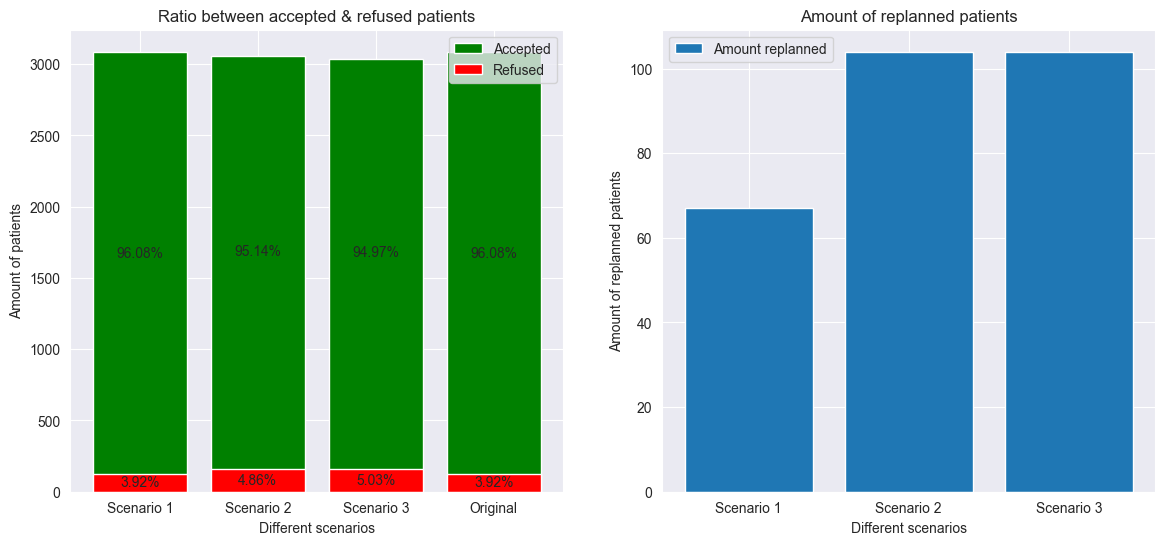

In [43]:
x = ["Scenario 1", "Scenario 2", "Scenario 3", "Original"]
y_1 = [len(opnames_scenario_1), len(opnames_scenario_2), len(opnames_scenario_3), len(opnames_original)]
y_2 = [len(geweigerd_scenario_1), len(geweigerd_scenario_2), len(geweigerd_scenario_3), len(geweigerd_original)]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(x, y_1, color="g", label="Accepted")
ax[0].bar(x, y_2, color="r", label="Refused")
for i in range(len(x)):
    total = y_1[i] + y_2[i]
    ax[0].text(i, y_2[i] / 2, f"{y_2[i] / total:.2%}", ha="center", va="center")
    ax[0].text(i, y_2[i] + y_1[i] / 2, f"{y_1[i] / total:.2%}", ha="center", va="center")
# ax.text(i, M / 2, f"{ratio_M:.2%}", ha="left", va="center")
# ax.text(i, F / 2, f"{ratio_F:.2%}", ha="right", va="center")
ax[0].set_ylabel("Amount of patients")
ax[0].set_xlabel("Different scenarios")
ax[0].set_title("Ratio between accepted & refused patients")
ax[0].legend()

x = ["Scenario 1", "Scenario 2", "Scenario 3"]
y_3 = [len(replanning_scenario_1), len(replanning_scenario_3), len(replanning_scenario_3)]
ax[1].bar(x, y_3, label="Amount replanned")
ax[1].set_ylabel("Amount of replanned patients")
ax[1].set_xlabel("Different scenarios")
ax[1].set_title("Amount of replanned patients")
ax[1].legend()

plt.show()

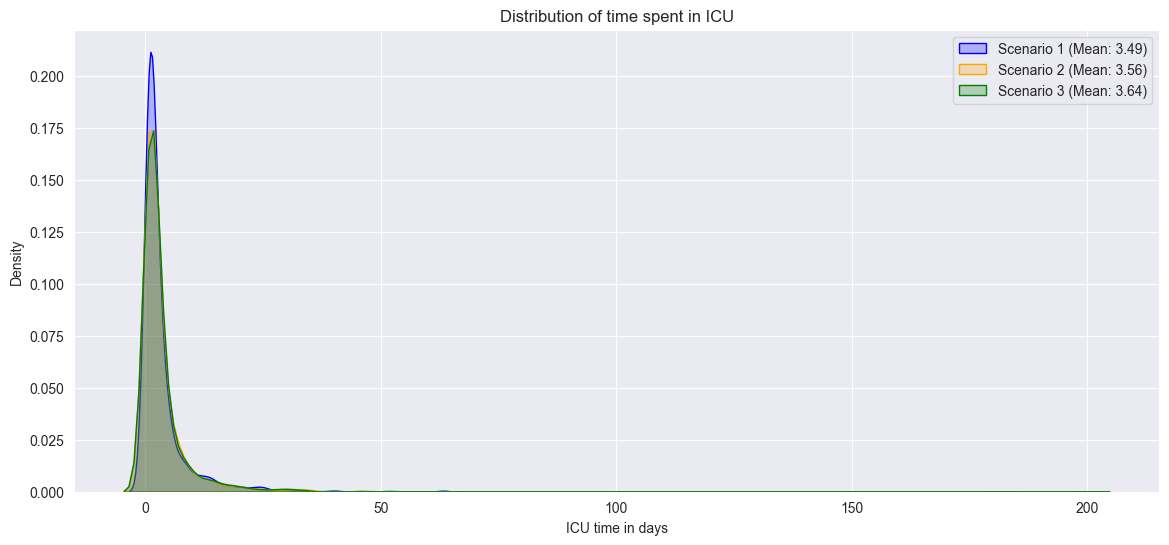

In [34]:
plt.figure(figsize=(14, 6))
sns.kdeplot(opnames_scenario_1['los_icu'], label=f'Scenario 1 (Mean: {opnames_scenario_1['los_icu'].mean():.3})', fill=True, color='blue')
sns.kdeplot(opnames_scenario_2['los_icu'], label=f'Scenario 2 (Mean: {opnames_scenario_2['los_icu'].mean():.3})', fill=True, color='orange')
sns.kdeplot(opnames_scenario_3['los_icu'], label=f'Scenario 3 (Mean: {opnames_scenario_3['los_icu'].mean():.3})', fill=True, color='green')
plt.title('Distribution of time spent in ICU')
plt.xlabel('ICU time in days')
plt.ylabel('Density')
plt.legend()
plt.show()

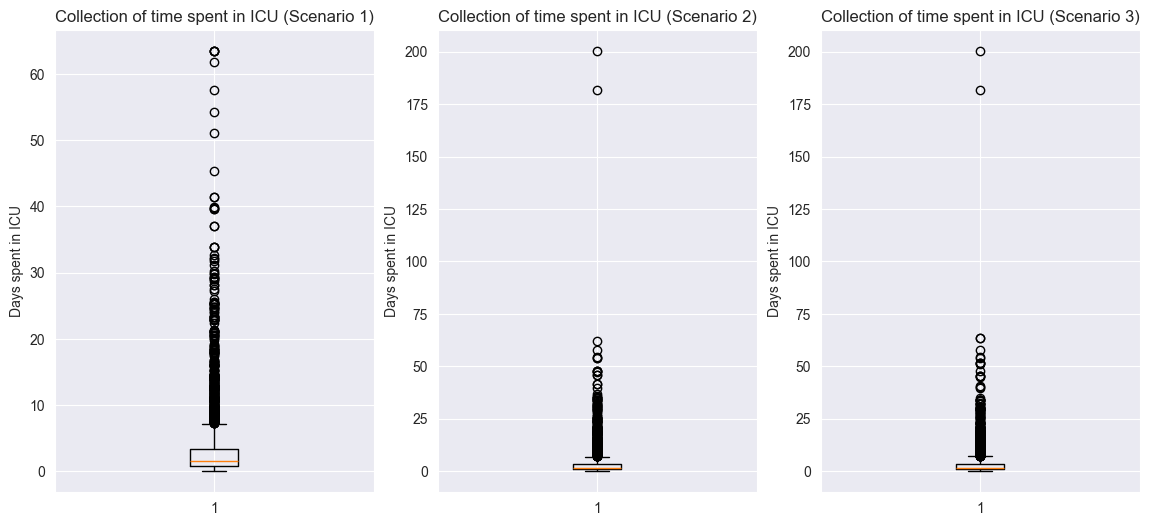

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].boxplot(opnames_scenario_1["los_icu"])
ax[0].set_ylabel("Days spent in ICU")
ax[0].set_title("Collection of time spent in ICU (Scenario 1)")

ax[1].boxplot(opnames_scenario_2["los_icu"])
ax[1].set_ylabel("Days spent in ICU")
ax[1].set_title("Collection of time spent in ICU (Scenario 2)")

ax[2].boxplot(opnames_scenario_3["los_icu"])
ax[2].set_ylabel("Days spent in ICU")
ax[2].set_title("Collection of time spent in ICU (Scenario 3)")

plt.show()

In [12]:
outlier_free_scenario_1 = opnames_scenario_1[opnames_scenario_1["los_icu"] < 120]["los_icu"]
outlier_free_scenario_2 = opnames_scenario_2[opnames_scenario_2["los_icu"] < 120]["los_icu"]
outlier_free_scenario_3 = opnames_scenario_3[opnames_scenario_3["los_icu"] < 120]["los_icu"]

print(pd.DataFrame([["Scenario 1", outlier_free_scenario_1.mean()], ["Scenario 2", outlier_free_scenario_2.mean()], ["Scenario 3", outlier_free_scenario_3.mean()]], columns=["Scenario", "Mean"]))

     Scenario      Mean
0  Scenario 1  3.494796
1  Scenario 2  3.433869
2  Scenario 3  3.518721


### Experiment 2

First we will start by checking the ratios across the different scenarios regarding the amount of refused patients. A simple bar plot will give us a clear view over the ratios of refused patient against accepted patients.

|   **Scenario** |1|
|---|---|
| **Planning method**  |  24 hours later |
| **Specialised** |  Yes |
| **Efficiency** |  5% |

|   **Scenario** |2|
|---|---|
| **Planning method**  |  random day within the coming week |
| **Specialised** |  Yes |
| **Efficiency** |  5% |


|   **Scenario** |3|
|---|---|
| **Planning method**  |  least busy day in the coming 2 weeks |
| **Specialised** |  Yes |
| **Efficiency** |  5% |

In [35]:
opnames_scenario_1, opnames_scenario_2, opnames_scenario_3 = get_experiment_dataframes(2, [3, 4, 5], "opnames")

geweigerd_scenario_1, geweigerd_scenario_2, geweigerd_scenario_3 = get_experiment_dataframes(2, [3, 4, 5], "geweigerd")

replanning_scenario_1, replanning_scenario_2, replanning_scenario_3 = get_experiment_dataframes(2, [3, 4, 5], "replanning")

opnames_original, = get_experiment_dataframes(2, [0], "opnames")
geweigerd_original, = get_experiment_dataframes(2, [0], "geweigerd")


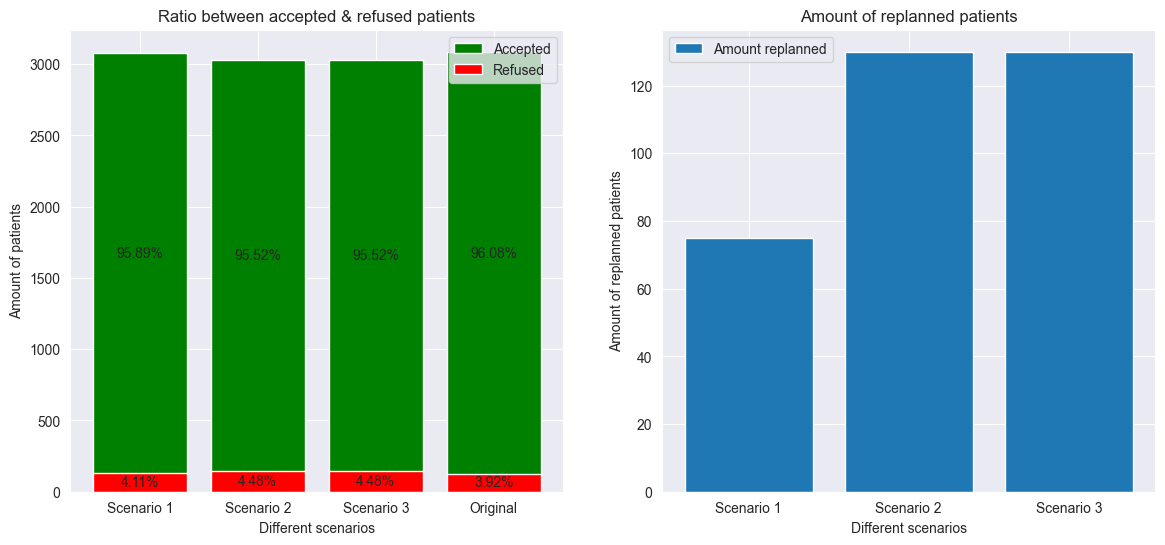

In [36]:
x = ["Scenario 1", "Scenario 2", "Scenario 3", "Original"]
y_1 = [len(opnames_scenario_1), len(opnames_scenario_3), len(opnames_scenario_3), len(opnames_original)]
y_2 = [len(geweigerd_scenario_1), len(geweigerd_scenario_3), len(geweigerd_scenario_3), len(geweigerd_original)]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(x, y_1, color="g", label="Accepted")
ax[0].bar(x, y_2, color="r", label="Refused")
for i in range(len(x)):
    total = y_1[i] + y_2[i]
    ax[0].text(i, y_2[i] / 2, f"{y_2[i] / total:.2%}", ha="center", va="center")
    ax[0].text(i, y_2[i] + y_1[i] / 2, f"{y_1[i] / total:.2%}", ha="center", va="center")
# ax.text(i, M / 2, f"{ratio_M:.2%}", ha="left", va="center")
# ax.text(i, F / 2, f"{ratio_F:.2%}", ha="right", va="center")
ax[0].set_ylabel("Amount of patients")
ax[0].set_xlabel("Different scenarios")
ax[0].set_title("Ratio between accepted & refused patients")
ax[0].legend()

x = ["Scenario 1", "Scenario 2", "Scenario 3"]
y_3 = [len(replanning_scenario_1), len(replanning_scenario_3), len(replanning_scenario_3)]
ax[1].bar(x, y_3, label="Amount replanned")
ax[1].set_ylabel("Amount of replanned patients")
ax[1].set_xlabel("Different scenarios")
ax[1].set_title("Amount of replanned patients")
ax[1].legend()

plt.show()

The 2 plots above display: the ratio between accepted and refused patients & the amount of replanned patients per scenario. What becomes instantly visible is that the ratios and the total amount of patients are almost the same around all scenarios. `Scenario 1` in both the ratio and the amount of replanned patients performs better than the other two replan methods.

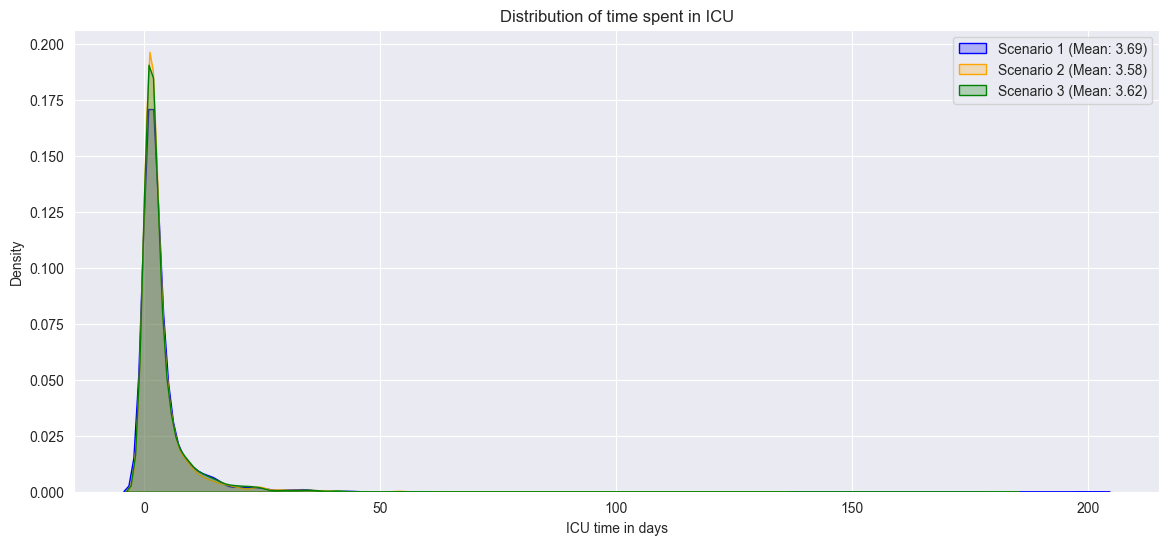

In [37]:
plt.figure(figsize=(14, 6))
sns.kdeplot(opnames_scenario_1['los_icu'], label=f'Scenario 1 (Mean: {opnames_scenario_1['los_icu'].mean():.3})', fill=True, color='blue')
sns.kdeplot(opnames_scenario_2['los_icu'], label=f'Scenario 2 (Mean: {opnames_scenario_2['los_icu'].mean():.3})', fill=True, color='orange')
sns.kdeplot(opnames_scenario_3['los_icu'], label=f'Scenario 3 (Mean: {opnames_scenario_3['los_icu'].mean():.3})', fill=True, color='green')
plt.title('Distribution of time spent in ICU')
plt.xlabel('ICU time in days')
plt.ylabel('Density')
plt.legend()
plt.show()

While the graph above doesn't tell use much right away, if we take a look at the means displayed in the legend we can see that in this case `Scenario 1` is the highest. As this is only a slight difference (which is also visible in the graph) we can make the assumption that this difference is due to the fact that there are slightly more patients admitted in `Scenario 1` in comparison to the other scenarios. 

There is a slight problem with this theory, because `Scenario 3` has less patients admitted while still having a higher mean than `Scenario 2`, it's hard to see in the graph above, but the fact that the x axis continues to `200+` means that we might have a few outliers. So lets create 3 boxplots that display the `los_icu` per scenario a little better.

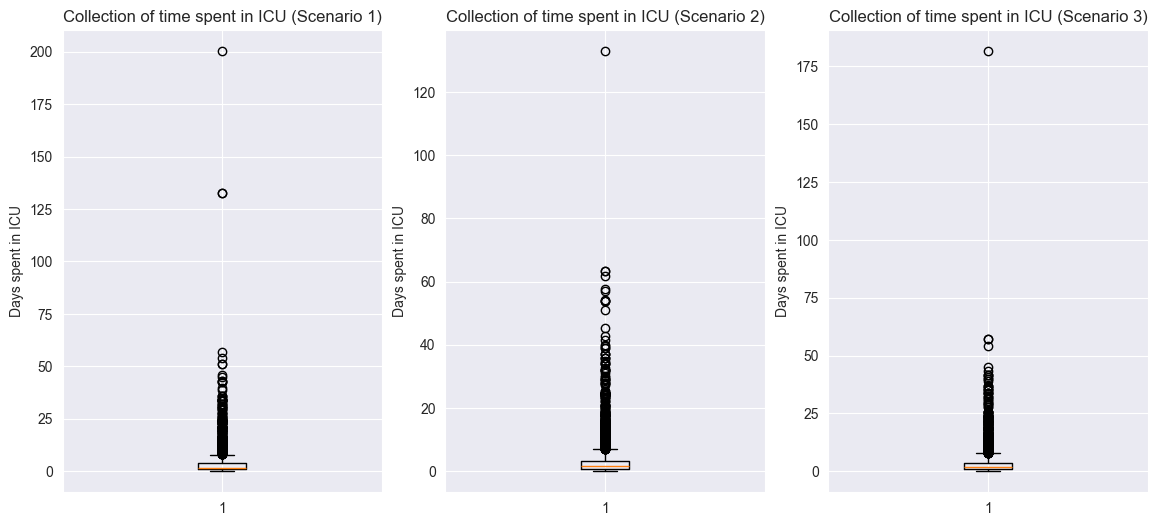

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].boxplot(opnames_scenario_1["los_icu"])
ax[0].set_ylabel("Days spent in ICU")
ax[0].set_title("Collection of time spent in ICU (Scenario 1)")

ax[1].boxplot(opnames_scenario_2["los_icu"])
ax[1].set_ylabel("Days spent in ICU")
ax[1].set_title("Collection of time spent in ICU (Scenario 2)")

ax[2].boxplot(opnames_scenario_3["los_icu"])
ax[2].set_ylabel("Days spent in ICU")
ax[2].set_title("Collection of time spent in ICU (Scenario 3)")

plt.show()

It seems it was the right choice to display the `los_icu` in boxplots, because our previous assumption was incorrect. it seems that the heavy outliers from the scenarios give a troubled few regarding the mean. So let's remove those outliers from each scenario and see what the mean is of the dense area's.

In [19]:
outlier_free_scenario_1 = opnames_scenario_1[opnames_scenario_1["los_icu"] < 120]["los_icu"]
outlier_free_scenario_2 = opnames_scenario_2[opnames_scenario_2["los_icu"] < 120]["los_icu"]
outlier_free_scenario_3 = opnames_scenario_3[opnames_scenario_3["los_icu"] < 120]["los_icu"]

print(pd.DataFrame([["Scenario 1", outlier_free_scenario_1.mean()], ["Scenario 2", outlier_free_scenario_2.mean()], ["Scenario 3", outlier_free_scenario_3.mean()]], columns=["Scenario", "Mean"]))

     Scenario      Mean
0  Scenario 1  3.540146
1  Scenario 2  3.539783
2  Scenario 3  3.558286


Currently `Scenario 2` still has the lowest this could be explained by the difference in accepted and refused patients. For this scenario the first case would perform the best

### Experiment 3
|   **Scenario** |1|
|---|---|
| **Planning method**  |  24 hours later |
| **Specialised** |  Yes |
| **Efficiency** |  10% |

|   **Scenario** |2|
|---|---|
| **Planning method**  |  random day within the coming week |
| **Specialised** |  Yes |
| **Efficiency** |  10% |


|   **Scenario** |3|
|---|---|
| **Planning method**  |  least busy day in the coming 2 weeks |
| **Specialised** |  Yes |
| **Efficiency** |  10% |

First we will start by checking the ratios across the different scenarios regarding the amount of refused patients. A simple bar plot will give us a clear view over the ratios of refused patient against accepted patients.

In [39]:
opnames_scenario_1, opnames_scenario_2, opnames_scenario_3 = get_experiment_dataframes(2, [6, 7, 8], "opnames")

geweigerd_scenario_1, geweigerd_scenario_2, geweigerd_scenario_3 = get_experiment_dataframes(2, [6, 7, 8], "geweigerd")

replanning_scenario_1, replanning_scenario_2, replanning_scenario_3 = get_experiment_dataframes(2, [6, 7, 8], "replanning")

opnames_original, = get_experiment_dataframes(2, [0], "opnames")
geweigerd_original, = get_experiment_dataframes(2, [0], "geweigerd")


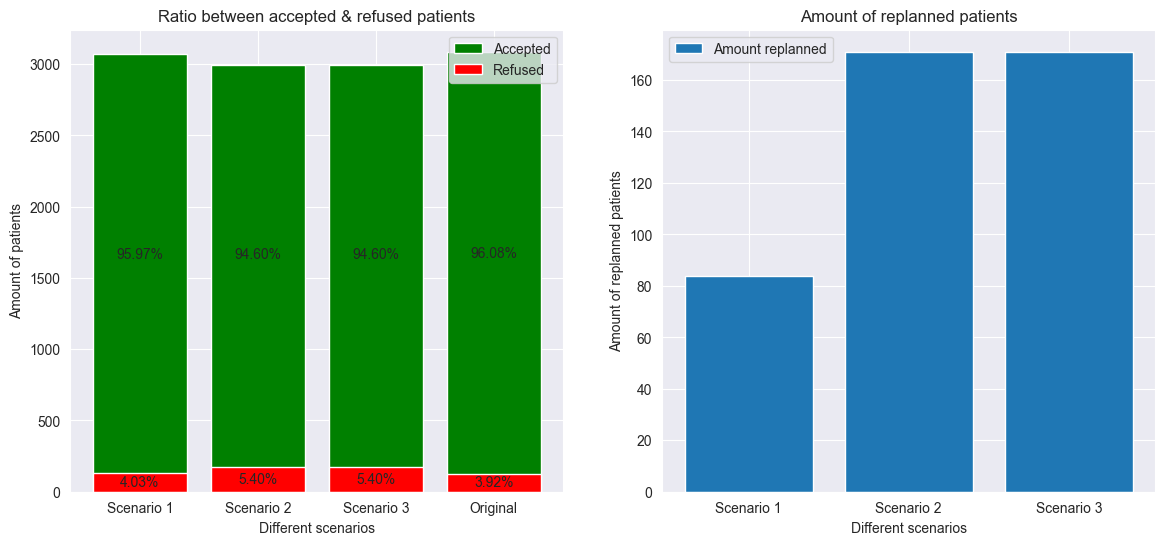

In [40]:
x = ["Scenario 1", "Scenario 2", "Scenario 3", "Original"]
y_1 = [len(opnames_scenario_1), len(opnames_scenario_3), len(opnames_scenario_3), len(opnames_original)]
y_2 = [len(geweigerd_scenario_1), len(geweigerd_scenario_3), len(geweigerd_scenario_3), len(geweigerd_original)]

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(x, y_1, color="g", label="Accepted")
ax[0].bar(x, y_2, color="r", label="Refused")
for i in range(len(x)):
    total = y_1[i] + y_2[i]
    ax[0].text(i, y_2[i] / 2, f"{y_2[i] / total:.2%}", ha="center", va="center")
    ax[0].text(i, y_2[i] + y_1[i] / 2, f"{y_1[i] / total:.2%}", ha="center", va="center")
# ax.text(i, M / 2, f"{ratio_M:.2%}", ha="left", va="center")
# ax.text(i, F / 2, f"{ratio_F:.2%}", ha="right", va="center")
ax[0].set_ylabel("Amount of patients")
ax[0].set_xlabel("Different scenarios")
ax[0].set_title("Ratio between accepted & refused patients")
ax[0].legend()

x = ["Scenario 1", "Scenario 2", "Scenario 3"]
y_3 = [len(replanning_scenario_1), len(replanning_scenario_3), len(replanning_scenario_3)]
ax[1].bar(x, y_3, label="Amount replanned")
ax[1].set_ylabel("Amount of replanned patients")
ax[1].set_xlabel("Different scenarios")
ax[1].set_title("Amount of replanned patients")
ax[1].legend()

plt.show()

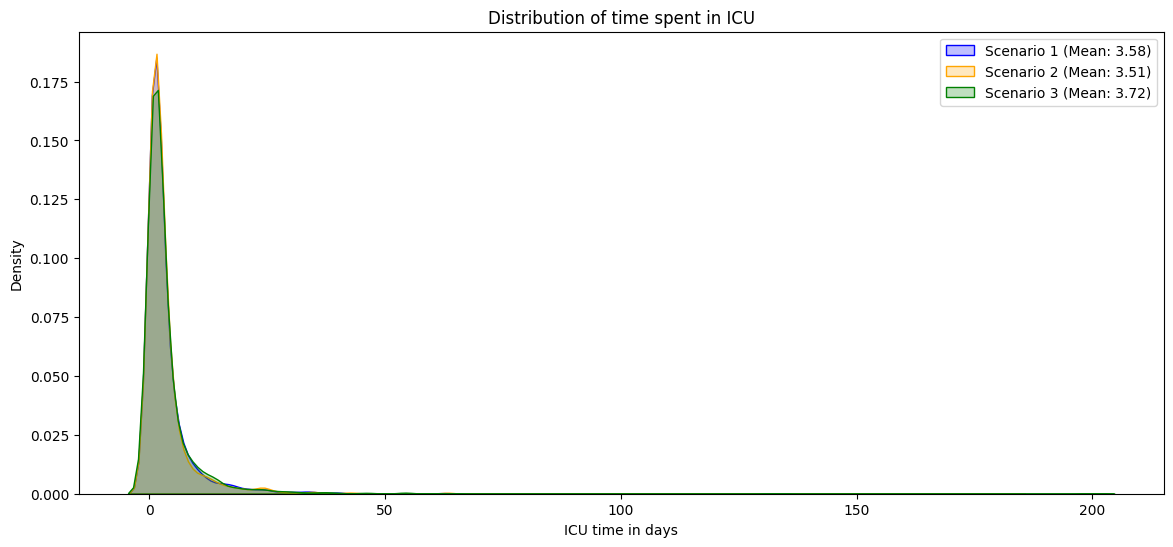

In [92]:
plt.figure(figsize=(14, 6))
sns.kdeplot(opnames_scenario_1['los_icu'], label=f'Scenario 1 (Mean: {opnames_scenario_1['los_icu'].mean():.3})', fill=True, color='blue')
sns.kdeplot(opnames_scenario_2['los_icu'], label=f'Scenario 2 (Mean: {opnames_scenario_2['los_icu'].mean():.3})', fill=True, color='orange')
sns.kdeplot(opnames_scenario_3['los_icu'], label=f'Scenario 3 (Mean: {opnames_scenario_3['los_icu'].mean():.3})', fill=True, color='green')
plt.title('Distribution of time spent in ICU')
plt.xlabel('ICU time in days')
plt.ylabel('Density')
plt.legend()
plt.show()

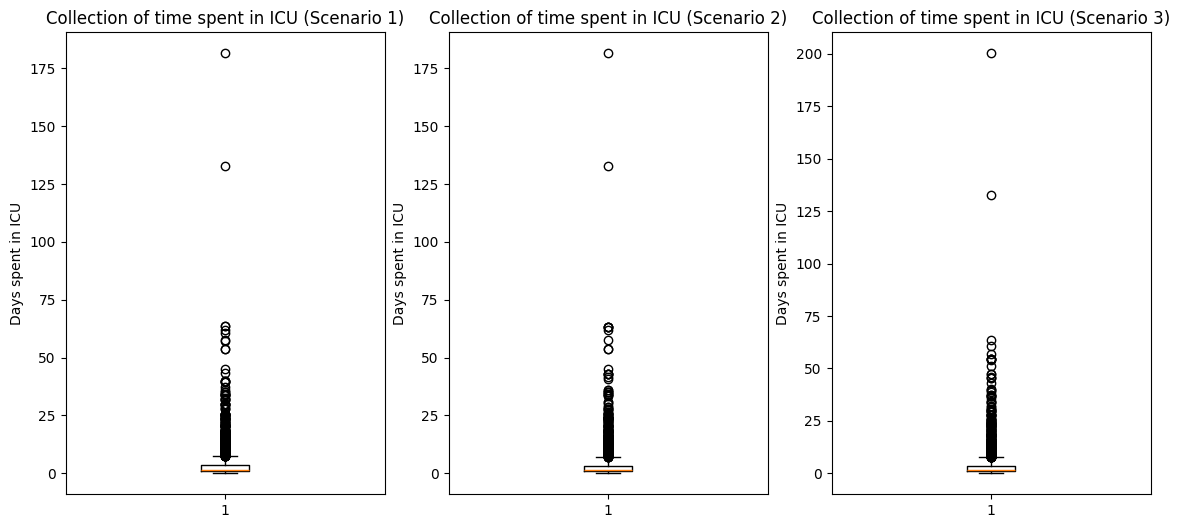

In [93]:
fig, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].boxplot(opnames_scenario_1["los_icu"])
ax[0].set_ylabel("Days spent in ICU")
ax[0].set_title("Collection of time spent in ICU (Scenario 1)")

ax[1].boxplot(opnames_scenario_2["los_icu"])
ax[1].set_ylabel("Days spent in ICU")
ax[1].set_title("Collection of time spent in ICU (Scenario 2)")

ax[2].boxplot(opnames_scenario_3["los_icu"])
ax[2].set_ylabel("Days spent in ICU")
ax[2].set_title("Collection of time spent in ICU (Scenario 3)")

plt.show()

In [94]:
outlier_free_scenario_1 = opnames_scenario_1[opnames_scenario_1["los_icu"] < 120]["los_icu"]
outlier_free_scenario_2 = opnames_scenario_2[opnames_scenario_2["los_icu"] < 120]["los_icu"]
outlier_free_scenario_3 = opnames_scenario_3[opnames_scenario_3["los_icu"] < 120]["los_icu"]

print(pd.DataFrame([["Scenario 1", outlier_free_scenario_1.mean()], ["Scenario 2", outlier_free_scenario_2.mean()], ["Scenario 3", outlier_free_scenario_3.mean()]], columns=["Scenario", "Mean"]))

     Scenario      Mean
0  Scenario 1  3.478725
1  Scenario 2  3.406998
2  Scenario 3  3.613217
